<a href="https://colab.research.google.com/github/sharmaanj200/Computer-Vision-IGDTUW/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


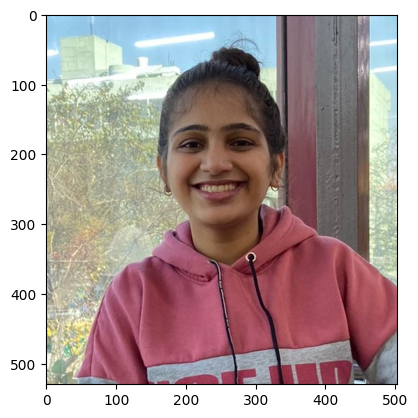

In [ ]:
"""
Q1. Image Reading: Upload your image on your google drive. Write python code on google colab to load your uploaded image into a numpy array variable and display the same in code.

"""

from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image_path = '/content/gdrive/MyDrive/official_image.jpg'

img = mpimg.imread(image_path)
img_array = np.array(img)

plt.imshow(img_array)
plt.show()

In [ ]:
"""
Q2. Image Collection: Create a folder on google drive. Upload any five images of varying sizes, some of them can be black-white images and some color images.
Use ‘for’ loop to iterate through all images in your folder.
For each image file found, display resolution of image, number of dimensions of numpy array in which image is stored, pixel value at any random (x,y) position.
You should use the python random generation library to select random x,y; provide appropriate range to the random function based on image resolution.

"""

import os
import random
from PIL import Image

folder_path = '/content/gdrive/MyDrive/Images'

for image_name in os.listdir(folder_path):
    if image_name.endswith('.jpg'):
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)
        img_array = np.array(img)
        width, height = img.size
        channels = img_array.shape[2] if len(img_array.shape) > 2 else 1
        random_x = random.randint(0, width - 1)
        random_y = random.randint(0, height - 1)
        pixel_value = img_array[random_y, random_x]
        print(f"Image: {image_name}")
        print(f"Resolution: {width}x{height}")
        print(f"Dimensions: {img_array.ndim}")
        print(f"Random Pixel Value at ({random_x}, {random_y}): {pixel_value}")

Image: 1.jpg
Resolution: 183x275
Dimensions: 3
Random Pixel Value at (40, 24): [ 56 182 255]
Image: 5.jpg
Resolution: 750x375
Dimensions: 3
Random Pixel Value at (597, 187): [245 185  97]
Image: 4.jpg
Resolution: 368x368
Dimensions: 3
Random Pixel Value at (99, 345): [0 0 0]
Image: 3.jpg
Resolution: 540x360
Dimensions: 3
Random Pixel Value at (222, 92): [238 200 177]
Image: 2.jpg
Resolution: 800x1200
Dimensions: 3
Random Pixel Value at (437, 720): [65 65 65]


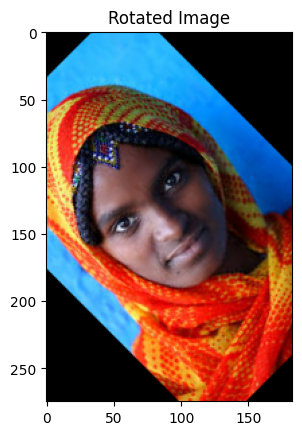

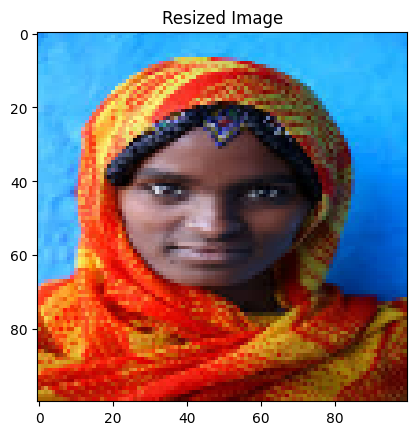

First ten pixel values (flattened): [255 149  37 253 147  34 247 148  34 246]


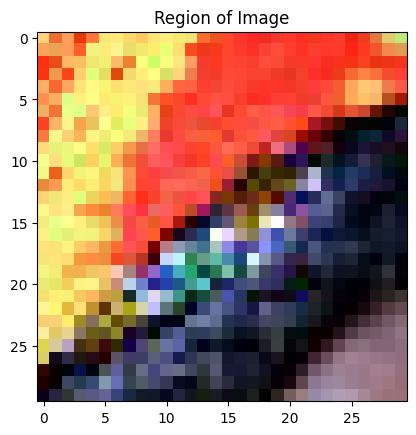

In [ ]:
"""
Q3. Image Manipulation: Select any one random image from the folder you created above.
You should use a random function to do this operation in code.
Perform following operations (for each operation, display the original and transformed image) on this image:
(a) rotation by 45 degree; (b) resize the image to any pre-defined resolution, you can hardcode this pre-defined resolution;
(c) flatten the image and print first ten pixel values;
(d) select a small region in the image, you can hardcode the dimensions of this small region.

"""

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

folder_path = '/content/gdrive/MyDrive/Images'
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]
random_image_file = random.choice(image_files)
image_path = os.path.join(folder_path, random_image_file)

img = cv2.imread(image_path)
height, width = img.shape[:2]

# a) Rotate by 45 degrees
M = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 1)
rotated_img = cv2.warpAffine(img, M, (width, height))

plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.show()

# b) Resize the image to a predefined resolution
predefined_width = 100
predefined_height = 100
resized_img = cv2.resize(img, (predefined_width, predefined_height))

plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.show()

# c) Flatten the image and print first ten pixel values
flattened_img = img.flatten()
print(f'First ten pixel values (flattened): {flattened_img[:10]}')

# d) Select a small region in the image
top_left_x = 50
top_left_y = 50
region_width = 30
region_height = 30
small_region = img[top_left_y:top_left_y + region_height, top_left_x:top_left_x + region_width]

plt.imshow(cv2.cvtColor(small_region, cv2.COLOR_BGR2RGB))
plt.title('Region of Image')
plt.show()

In [ ]:
"""
Q4. Basic Image Handling: Perform the following on Image Dataset.
Create your own copy of the google drive folder which contains the five images.
Your program (written in google colab) should read from this folder that you have created.
Load all the images into appropriate data structure (numpy array). Check the number of dimensions of this numpy array variable.
Resize all images to 100*100.
Display the resultant images.
Draw image color histogram for each of these images. Write your observation as a comment.

"""

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

folder_path = '/content/gdrive/MyDrive/a2_img_data'
images = []

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)

images_array = np.array(images)
print('Number of dimensions:', images_array.ndim)

Number of dimensions: 1


<ipython-input-20-13cc73573092>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_array = np.array(images)


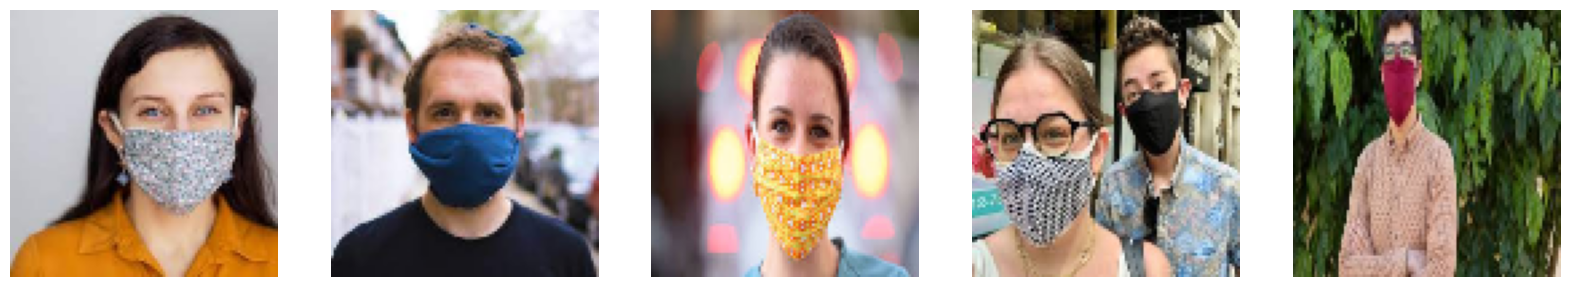

In [ ]:
#resizing image
resized_images = [cv2.resize(image, (100, 100)) for image in images]

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i, image in enumerate(resized_images):
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].axis('off')
plt.show()

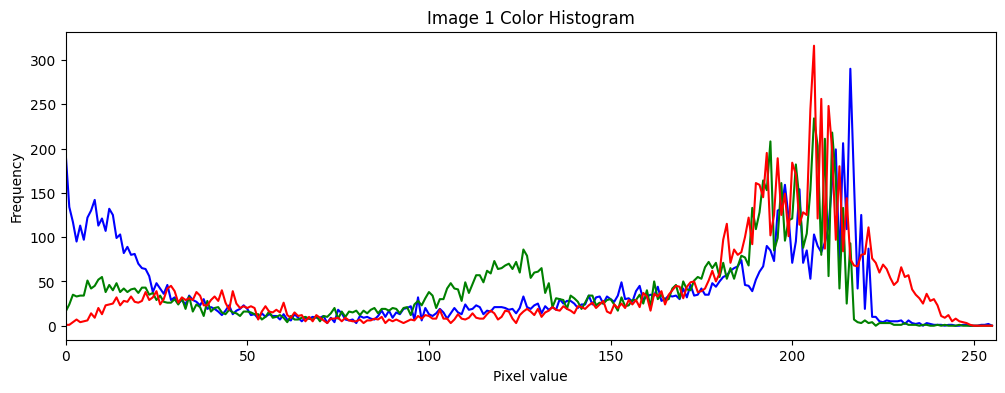

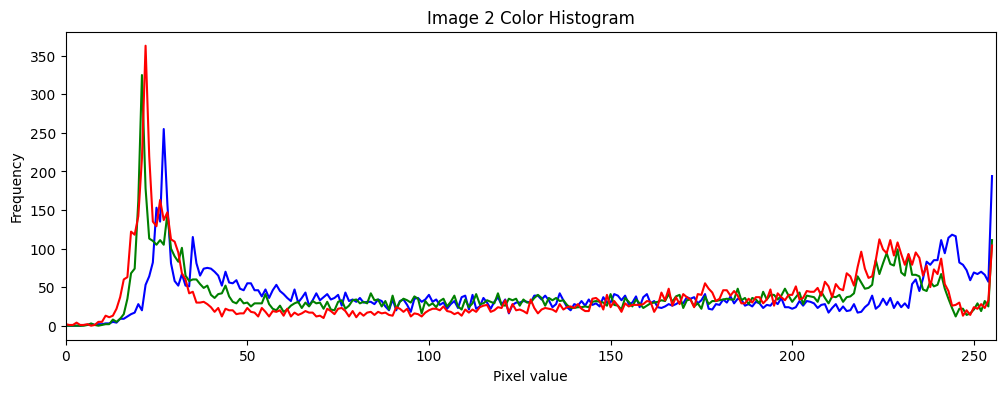

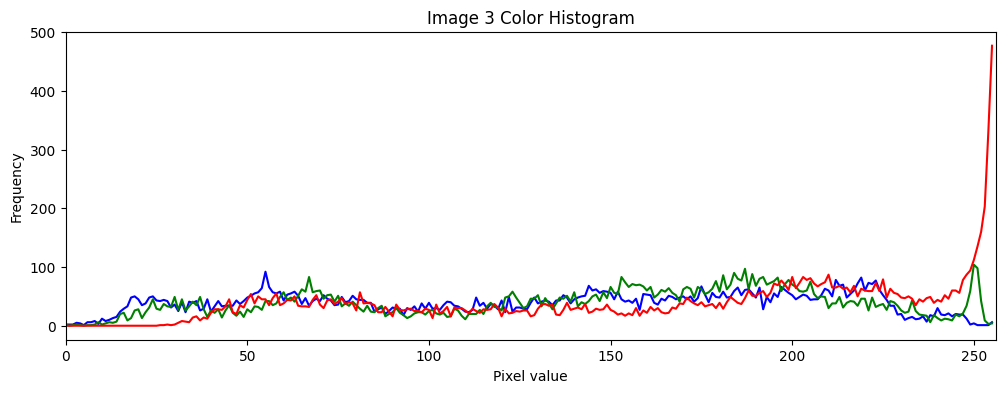

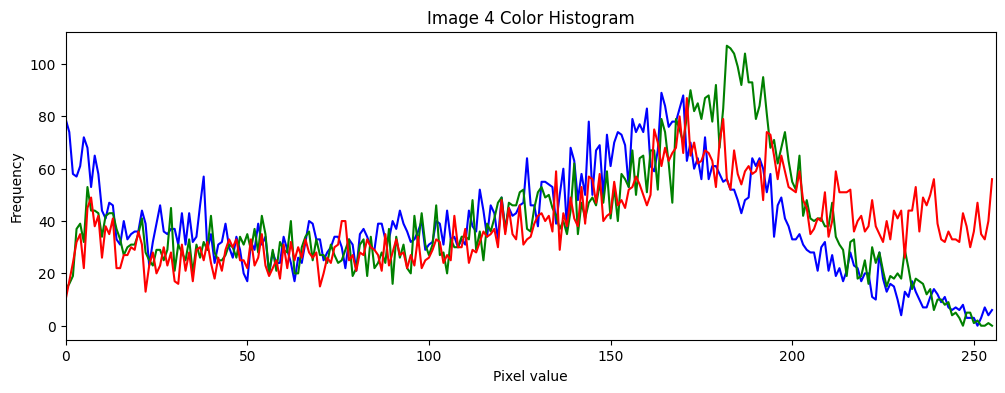

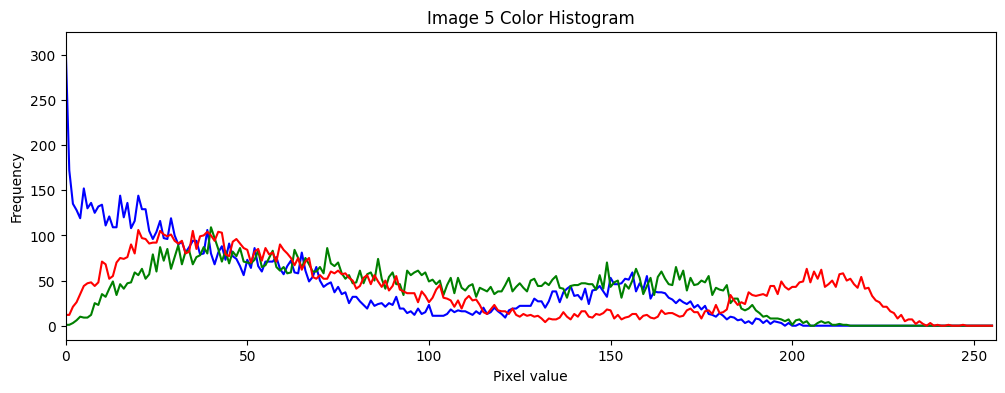

In [ ]:
# Image Color Histogram for Each Image:
for i, image in enumerate(resized_images):
    plt.figure(figsize=(12, 4))
    for j, color in enumerate(['b', 'g', 'r']):
        histogram = cv2.calcHist([image], [j], None, [256], [0, 256])
        plt.plot(histogram, color=color)
        plt.xlim([0, 256])

    plt.title(f'Image {i+1} Color Histogram')
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')

    plt.show()


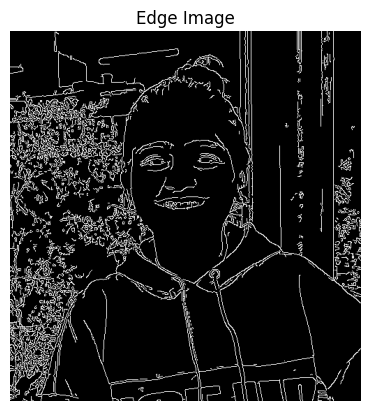

In [ ]:
"""
Q5. Edge Detection: In a given image, edges are important features. Therefore, detection of edges is an important step in image feature extraction or image processing.
Perform edge detection on a given input image.

"""

import cv2

sample_image = '/content/gdrive/MyDrive/official_image.jpg'

image = cv2.imread(sample_image, cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, threshold1=100, threshold2=200)

plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')
plt.show()



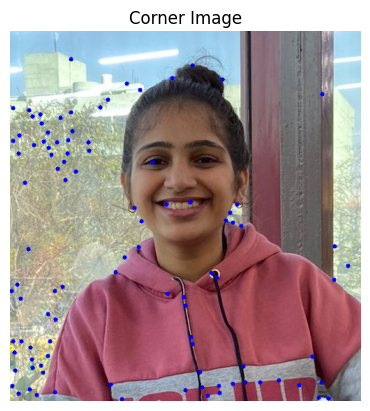

In [ ]:
"""
Q6. Corner Detection: Corners are those regions in an image where color intensity changes rapidly.
Identifying corners in a given image is referred to as corner detection. Perform corner detection on a given input image.

"""

image_color = cv2.imread('/content/gdrive/MyDrive/official_image.jpg')
image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(image, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_color, (x, y), 3, (255, 0, 0), -1)

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title('Corner Image')
plt.axis('off')
plt.show()


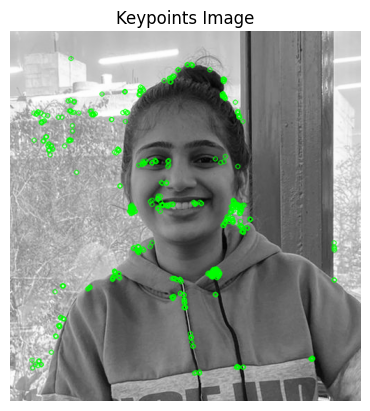

In [ ]:
"""
Q7. Corner Detection: Corners are those regions in an image where color intensity changes rapidly.
Identifying corners in a given image is referred to as corner detection. Perform corner detection on a given input image.

"""
keypoints_image = cv2.imread('/content/gdrive/MyDrive/official_image.jpg')
orb = cv2.ORB_create()

keypoints = orb.detect(image, None)

keypoints_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

plt.imshow(keypoints_image)
plt.title('Keypoints Image')
plt.axis('off')
plt.show()


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

unpickle()

In [ ]:
"""
Q8. Image Classification: Use “down-sampled” CIFAR-10 dataset to perform image classification using KNN algorithm, take K=1, and use L1 as the distance metric between two images.
Output precision, recall, F1-score for each class, and also find the average accuracy. Down-sampling is to be done as follows.
Original CIFAR-10 dataset comprises 50,000 images for training; there are 5,000 images for each of the ten classes in it.
In this exercise, you should reduce training data from 50,000 images to 5,000 images such that 500 images are randomly picked from each class.
Similarly, reduce the test data of 10,000 images to 1,000 images such that there 100 images randomly picked from each class.

"""

import numpy as np
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_batch(filename):
    batch = unpickle(filename)
    features = batch[b'data'].reshape((len(batch[b'data']), 32, 32, 3), order='F')
    labels = batch[b'labels']
    return features, labels

def downsample(features, labels, num_samples=500):
    # Assure each class has the same number of images
    unique_classes = set(labels)
    downsampled_features = []
    downsampled_labels = []
    for cls in unique_classes:
        class_indices = [i for i, label in enumerate(labels) if label == cls]
        downsampled_indices = np.random.choice(class_indices, num_samples, replace=False)
        downsampled_features.extend(features[downsampled_indices])
        downsampled_labels.extend([cls for _ in range(num_samples)])
    return np.array(downsampled_features), np.array(downsampled_labels)

# Load all training batches
all_features = []
all_labels = []
for i in range(1, 6):
    features, labels = load_batch(f'/content/drive/MyDrive/cifar-10-batches-py/data_batch_{i}')
    all_features.append(features)
    all_labels.append(labels)
train_features = np.concatenate(all_features)
train_labels = np.concatenate(all_labels)

# Downsample training data
train_features, train_labels = downsample(train_features, train_labels, 500)

# Load test batch
test_features, test_labels = load_batch('/content/drive/MyDrive/cifar-10-batches-py/test_batch')
# Downsample test data
test_features, test_labels = downsample(test_features, test_labels, 100)

# Flatten the images for KNN
X_train = train_features.reshape((train_features.shape[0], -1))
X_test = test_features.reshape((test_features.shape[0], -1))

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X_train, train_labels)
predictions = knn.predict(X_test)

# Evaluating the classifier
print("Classification report:\n", classification_report(test_labels, predictions, digits=3))
print("Average Accuracy:", accuracy_score(test_labels, predictions))


Classification report:
               precision    recall  f1-score   support

           0      0.392     0.400     0.396       100
           1      0.390     0.160     0.227       100
           2      0.216     0.300     0.251       100
           3      0.274     0.230     0.250       100
           4      0.204     0.400     0.270       100
           5      0.274     0.200     0.231       100
           6      0.270     0.330     0.297       100
           7      0.612     0.300     0.403       100
           8      0.384     0.580     0.462       100
           9      0.512     0.220     0.308       100

    accuracy                          0.312      1000
   macro avg      0.353     0.312     0.310      1000
weighted avg      0.353     0.312     0.310      1000

Average Accuracy: 0.312


In [ ]:
"""
Q9. Hyperparameter Tuning: Perform hyperparameter tuning using your downsampled training dataset.
You should perform 5-fold cross validation as discussed in the link on training data to tune hyperparameters:
(1) K-value, take possible values as 1,3,5; and (2) Distance metric as L1, L2. [5pt]

"""

from sklearn.model_selection import cross_val_score, KFold

# Possible k-values and distance metrics
k_values = [1, 3, 5]
distance_metrics = ['manhattan', 'euclidean']  # L1 and L2 distances

# Store the average cross-validation scores for each hyperparameter combination
cv_scores = []

# 5-fold cross-validation setup
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Iterate over all possible combinations of hyperparameters
for k in k_values:
    for metric in distance_metrics:
        # Initialize KNN with the current set of hyperparameters
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Compute cross-validated accuracy scores
        scores = cross_val_score(knn, X_train, train_labels, cv=kf, scoring='accuracy')

        # Compute the average score and store it with the hyperparameter combination
        avg_score = np.mean(scores)
        cv_scores.append((k, metric, avg_score))
        print(f"K: {k}, Distance Metric: {metric}, Average CV Accuracy: {avg_score}")

# Find the hyperparameters with the best average CV accuracy
best_hyperparameters = max(cv_scores, key=lambda x: x[2])
best_k, best_metric, best_score = best_hyperparameters

print(f"Best K: {best_k}, Best Distance Metric: {best_metric}, Best CV Accuracy: {best_score}")

# You can now create the final model using these hyperparameters and fit it to the entire downsampled training data if desired.
knn_final = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_final.fit(X_train, train_labels)

# Optionally, evaluate the final model on the downsampled test data
predictions_final = knn_final.predict(X_test)
print("Final Model Classification report:\n", classification_report(test_labels, predictions_final, digits=3))
print("Final Model Average Accuracy:", accuracy_score(test_labels, predictions_final))


K: 1, Distance Metric: manhattan, Average CV Accuracy: 0.2806
K: 1, Distance Metric: euclidean, Average CV Accuracy: 0.2538
K: 3, Distance Metric: manhattan, Average CV Accuracy: 0.2684
K: 3, Distance Metric: euclidean, Average CV Accuracy: 0.24900000000000003
K: 5, Distance Metric: manhattan, Average CV Accuracy: 0.2728
K: 5, Distance Metric: euclidean, Average CV Accuracy: 0.2514
Best K: 1, Best Distance Metric: manhattan, Best CV Accuracy: 0.2806
Final Model Classification report:
               precision    recall  f1-score   support

           0      0.392     0.400     0.396       100
           1      0.390     0.160     0.227       100
           2      0.216     0.300     0.251       100
           3      0.274     0.230     0.250       100
           4      0.204     0.400     0.270       100
           5      0.274     0.200     0.231       100
           6      0.270     0.330     0.297       100
           7      0.612     0.300     0.403       100
           8      0.384